In [1]:
%matplotlib notebook
%autosave 0
%load_ext autoreload
%autoreload 2

Autosave disabled


In [2]:
import matplotlib.pyplot as plt
from dtrace import rpath
from Associations import Association
from dtrace.Preliminary import DrugPreliminary, CrisprPreliminary

In [3]:
# ### Import data-sets
dtype = "ic50"

In [4]:
assoc = Association(dtype=dtype)

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


[2019-02-26 15:44:15,167 - INFO]: #(Samples)=500
[2019-02-26 15:44:17,760 - INFO]: #(Drugs)=589; #(Genes)=16818; #(Genomic)=536; 


## Principal Component Analysis (PCA)

Import PCA results performed on the drug-response and CRISPR-Cas9 data-sets both per drug/gene and per samples. Note
PCA is performed after running the first notebook (0.Associations).

In [5]:
pca_drug = assoc.drespo_obj.import_pca()[dtype]
pca_crispr = assoc.crispr_obj.import_pca()

## Growth-rate correlation analysis

Correlation of cell lines growth rates (unperturbed) with drug-response (ln IC50).

In [6]:
g_corr = assoc.drespo_obj.perform_growth_corr(subset=assoc.samples)[dtype]

[2019-02-25 22:03:17,760 - INFO]: Correlation with growth using 425 cell lines
[2019-02-25 22:03:18,834 - INFO]: Correlation with growth using 425 cell lines


Correlation of cell lines growth rates (unperturbed) with CRISPR-Cas9 (scaled log2 fold-change; median essential = -1)

In [7]:
c_corr = assoc.crispr_obj.perform_growth_corr(subset=assoc.samples)

[2019-02-25 22:03:20,428 - INFO]: Correlation with growth using 425 cell lines


## Strong viability responses

Count for each compound the number of IC50s that are lower than 50% of the maximum concentration used for the
respective compound

In [8]:
num_resp_drug = assoc.drespo_obj.perform_number_responses(
    resp_thres=0.5, subset=assoc.samples
)

Count for each gene the number of fold-changes (scaled log2) that are lower than -0.5, i.e. have a viability impact
lower than 50% of that observed in the set of known essential genes.

In [10]:
num_resp_crispr = assoc.crispr_obj.perform_number_responses(
    thres=-0.5, subset=assoc.samples
)

# Drug-response

Drug-response (IC50s) measurements across cell lines cumulative distribution

<IPython.core.display.Javascript object>


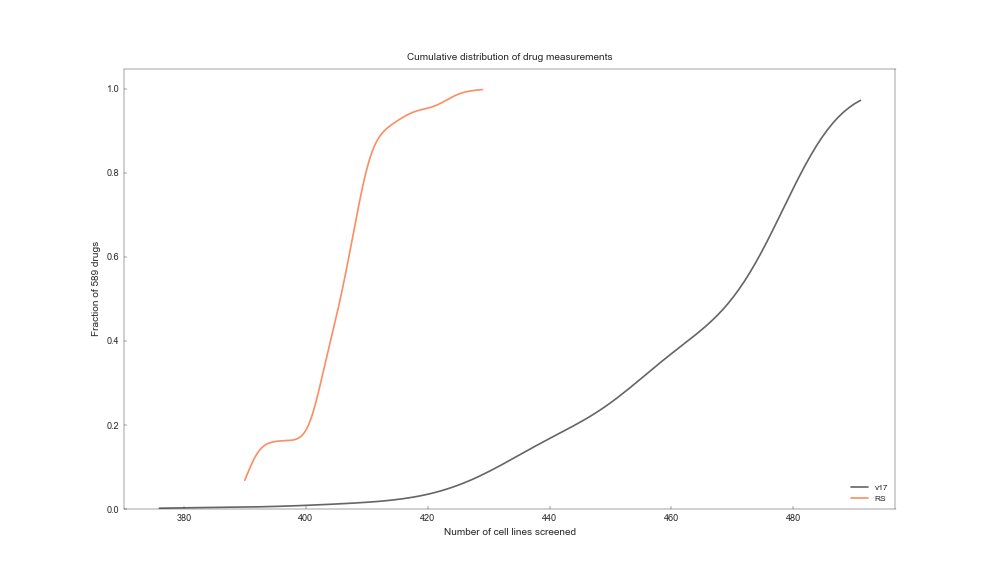

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [5]:
DrugPreliminary.histogram_drug(assoc.drespo.count(1))

plt.gcf().set_size_inches(3, 1.5)
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_drug.pdf",
    bbox_inches="tight",
    transparent=True,
)

plt.show()

Cumulative distribution of strong drug-response measurements. Strong response measurements are defined as IC50 < 50%
Max. concentration

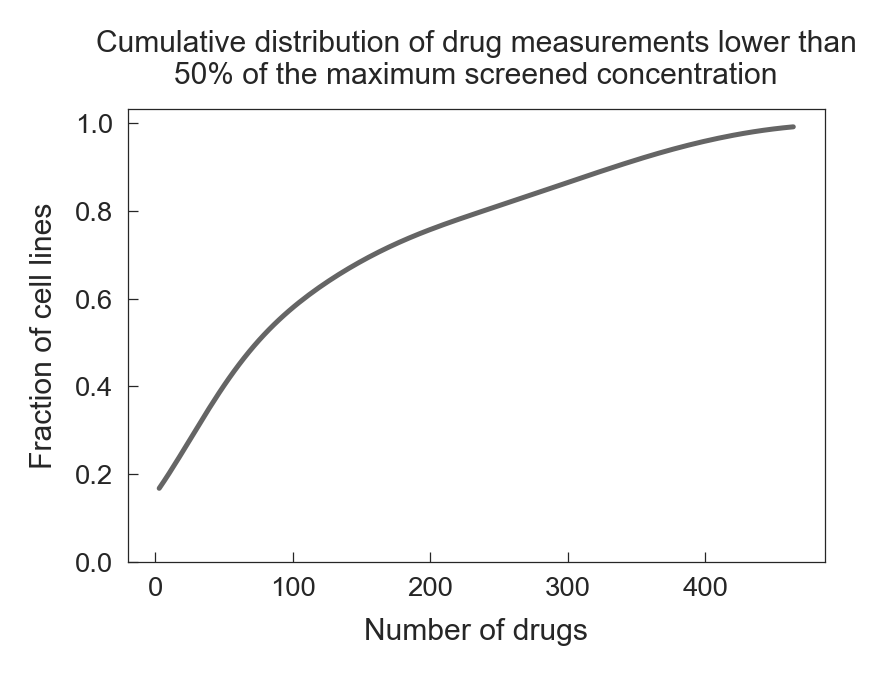

In [12]:
plt.figure(figsize=(3, 2), dpi=300)
DrugPreliminary.histogram_strong_response(num_resp_drug)
plt.xlabel("Number of drugs")
plt.ylabel("Fraction of cell lines")
plt.title(
    "Cumulative distribution of drug measurements lower than\n50% of the maximum screened concentration"
)
plt.savefig(
    f"{rpath}/preliminary_drug_response_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Cumulative distribution of samples with measurements across all compounds screened

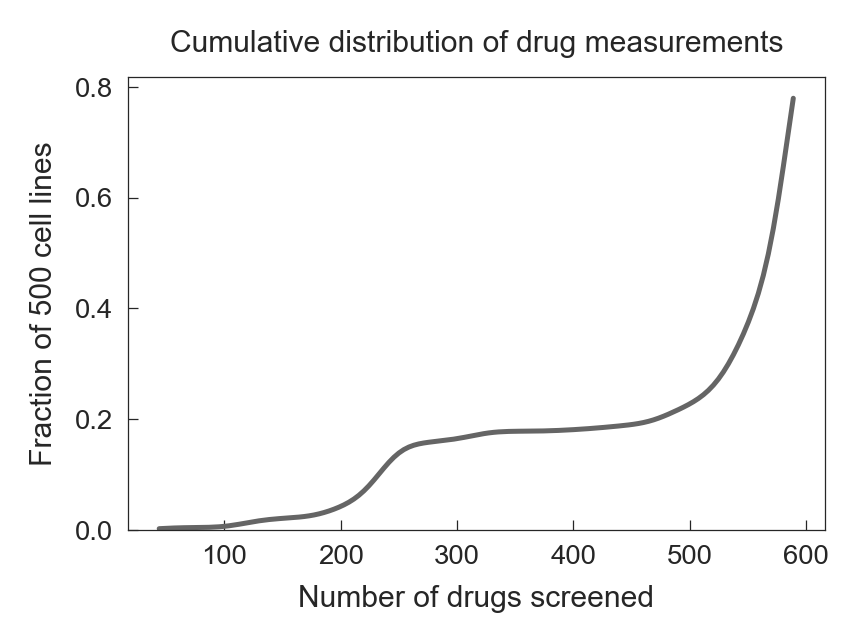

In [13]:
plt.figure(figsize=(3, 2), dpi=300)
DrugPreliminary.histogram_sample(assoc.drespo.count(0))
plt.savefig(
    f"{rpath}/preliminary_drug_histogram_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of drugs

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

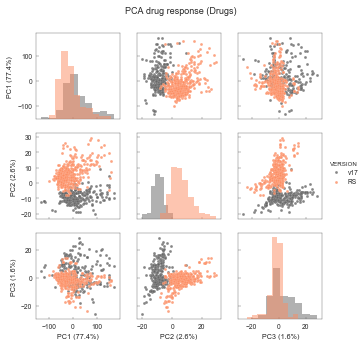

In [14]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_by_rows(pca_drug)
plt.suptitle("PCA drug response (Drugs)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot.pdf", bbox_inches="tight", transparent=True
)
plt.show()

Principal components of samples in the drug-response

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

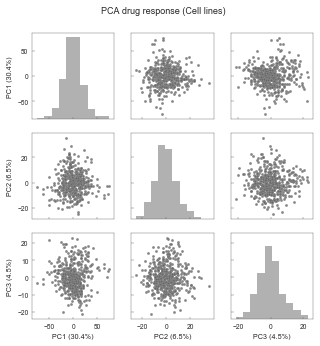

In [15]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_by_columns(pca_drug)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of samples in the drug-response coloured by cancer type

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

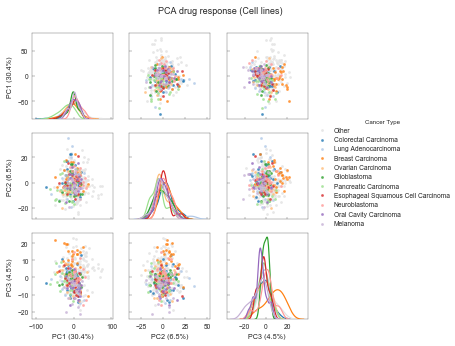

In [16]:
plt.figure(figsize=(4, 4), dpi=300)
DrugPreliminary.pairplot_pca_samples_cancertype(
    pca_drug, assoc.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA drug response (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Drug-response PCs correlation with growth-rates

[2019-02-25 22:07:08,550 - INFO]: Correlation with growth using 425 cell lines


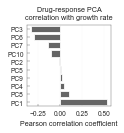

In [17]:
plot_df = assoc.samplesheet.growth_corr(pca_drug["column"]["pcs"].T)
DrugPreliminary.growth_corrs_pcs_barplot(plot_df)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_pcs_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Samples drug-response PC1 correlation with growth-rate

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

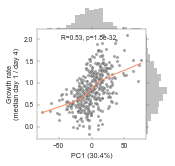

In [18]:
plt.figure(figsize=(2, 2), dpi=300)
DrugPreliminary.corrplot_pcs_growth(
    pca_drug, assoc.samplesheet.samplesheet["growth"], "PC1"
)
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Histogram of samples drug-response PC1 correlation with growth-rate

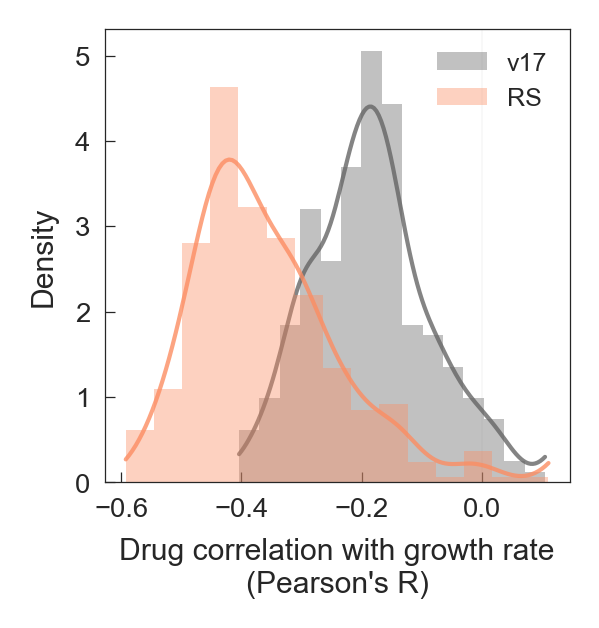

In [19]:
plt.figure(figsize=(2, 2), dpi=300)
DrugPreliminary.growth_correlation_histogram(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Top correlated drugs with growth-rate

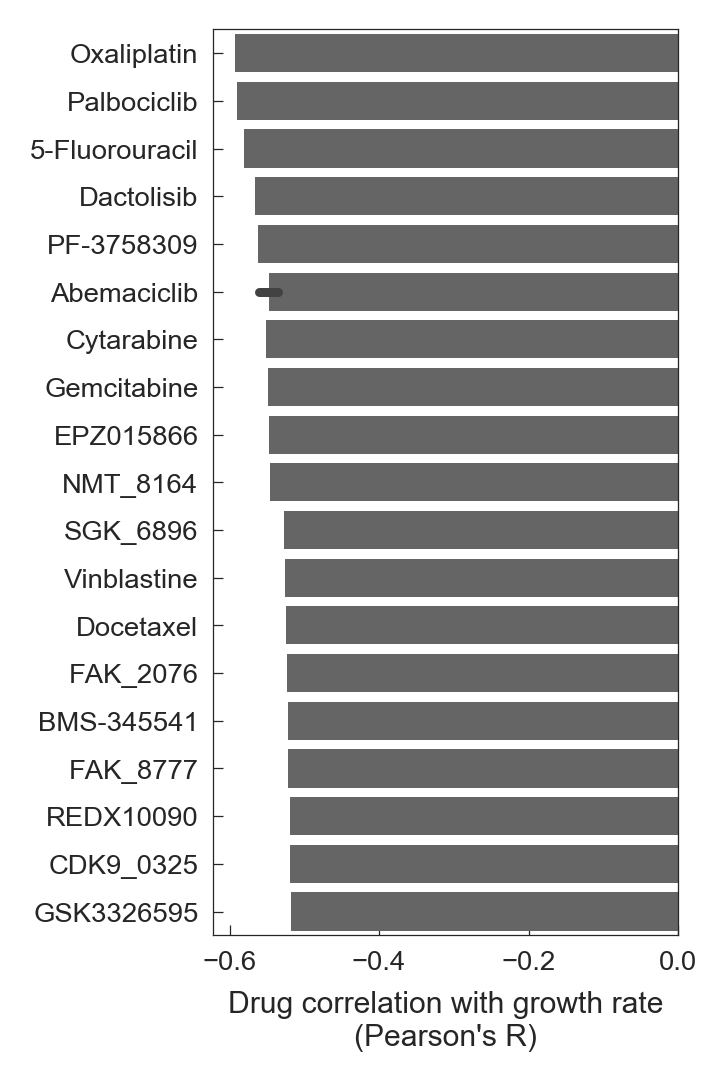

In [20]:
plt.figure(figsize=(2, 4), dpi=300)
DrugPreliminary.growth_correlation_top_drugs(g_corr)
plt.savefig(
    f"{rpath}/preliminary_drug_pca_growth_corrplot_top.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

# CRISPR-Cas9

Cumulative distribution of strong gene essentiality measurements. Strong response measurements are defined as log2
scaled fold-changes lower than 50% of that observed in known essential genes.

[2019-02-25 22:12:26,502 - WARNING]: No handles with labels found to put in legend.


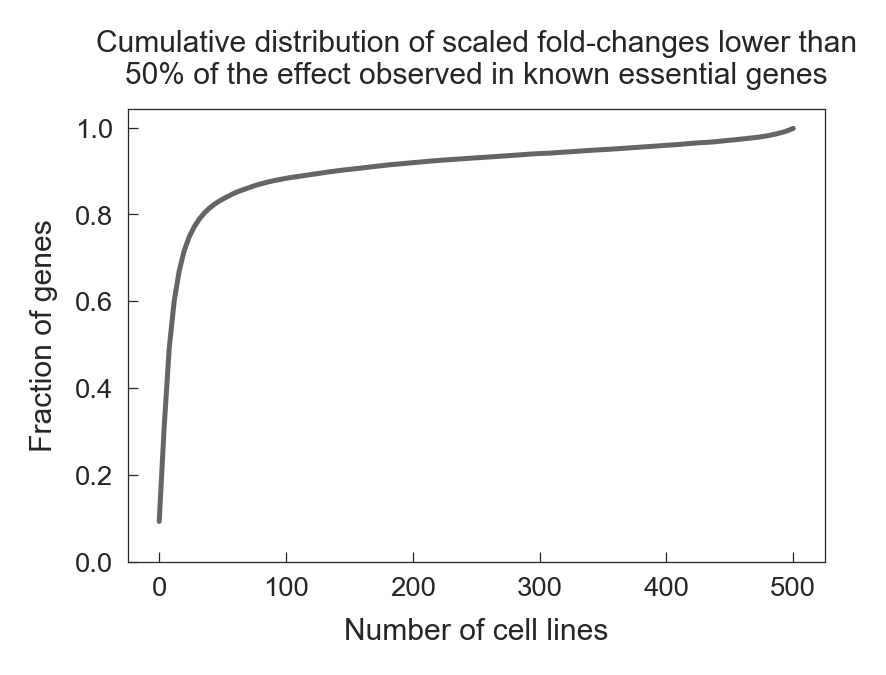

In [31]:
plt.figure(figsize=(3, 2), dpi=300)
DrugPreliminary.histogram_strong_response(num_resp_crispr)
plt.xlabel("Number of cell lines")
plt.ylabel("Fraction of genes")
plt.title(
    "Cumulative distribution of scaled fold-changes lower than\n50% of the effect observed in known essential genes"
)
plt.savefig(
    f"{rpath}/preliminary_crispr_response_histogram.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of the genes in the CRISPR-Cas9 data-set

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

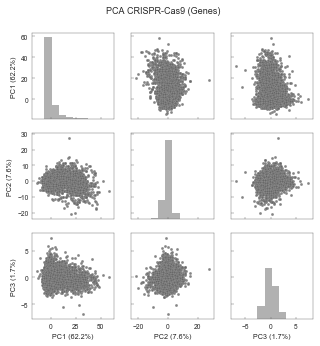

In [22]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_rows(pca_crispr, hue=None)
plt.suptitle("PCA CRISPR-Cas9 (Genes)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot.png",
    bbox_inches="tight",
    transparent=True,
    dpi=300,
)
plt.show()

Principal components of the samples in the CRISPR-Cas9 data-set

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

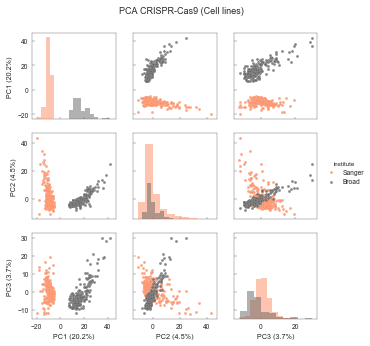

In [23]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_by_columns(
    pca_crispr, hue="institute", hue_vars=assoc.samplesheet.samplesheet["institute"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_samples.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Principal components of the samples in the CRISPR-Cas9 data-set coloured by cancer type

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1200x1200 with 0 Axes>

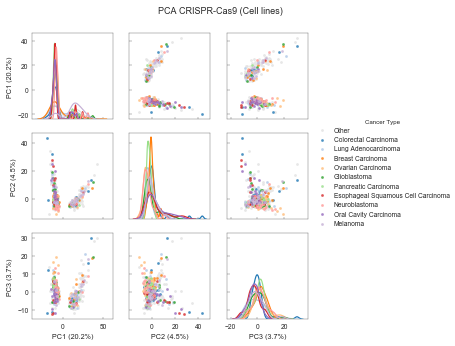

In [24]:
plt.figure(figsize=(4, 4), dpi=300)
CrisprPreliminary.pairplot_pca_samples_cancertype(
    pca_crispr, assoc.samplesheet.samplesheet["cancer_type"]
)
plt.suptitle("PCA CRISPR-Cas9 (Cell lines)", y=1.05, fontsize=9)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_pairplot_cancertype.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Drug-response PCs correlation with growth-rates

[2019-02-25 22:07:34,700 - INFO]: Correlation with growth using 425 cell lines


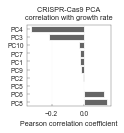

In [25]:
plot_df = assoc.samplesheet.growth_corr(pca_crispr["column"]["pcs"].T)
CrisprPreliminary.growth_corrs_pcs_barplot(plot_df)
plt.gcf().set_size_inches(1.5, 1.5)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_growth_pcs_barplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

CRISPR samples principal component correlation with growth rates

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

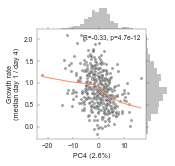

In [26]:
plt.figure(figsize=(2, 2), dpi=300)
CrisprPreliminary.corrplot_pcs_growth(
    pca_crispr, assoc.samplesheet.samplesheet["growth"], "PC4"
)
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_growth_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

CRISPR gene principal component correlation with essentiality

Correlation CRISPR genes PC1 with number of times a gene has a strong essentiality profile across the cell lines.
Strong essentiality is defined as true if: scaled log2 FC < -0.5 (meaning 50% of the effect of known essential genes).

/Users/eg14/anaconda3/envs/crispy/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 600x600 with 0 Axes>

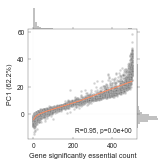

In [40]:
plt.figure(figsize=(2, 2), dpi=300)
CrisprPreliminary.corrplot_pcs_essentiality(pca_crispr, num_resp_crispr, "PC1")
plt.gcf().set_size_inches(2, 2)
plt.savefig(
    f"{rpath}/preliminary_crispr_pca_essentiality_corrplot.pdf",
    bbox_inches="tight",
    transparent=True,
)
plt.show()

Copyright (C) 2019 Emanuel Goncalves